In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [2]:
data = pd.read_csv("US_Accidents_Dec20.csv")
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
colsToDelete = ['ID', 'Source', 'TMC', 'Start_Time', 'End_Time',
                'End_Lat', 'End_Lng', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
                'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp']
data = data.drop(colsToDelete, axis=1).dropna()
data.to_csv('cleaned.csv')
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,40.100590,-82.925194,0.01,37.9,35.5,97.0,29.63,7.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
9,3,40.100590,-82.925194,0.01,37.4,33.8,100.0,29.62,3.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
11,3,39.932709,-82.830910,0.01,37.4,33.8,100.0,29.62,3.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
14,2,39.972038,-82.913521,0.01,37.4,33.8,100.0,29.62,3.0,SSW,...,False,False,False,False,True,False,Day,Day,Day,Day
20,2,40.052509,-82.882332,0.00,33.8,29.6,100.0,29.62,2.0,NNW,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
WindDirections        = list( data["Wind_Direction"].unique() )
WeatherConditions     = list( data["Weather_Condition"].unique() )
SunriseSunsets        = list( data["Sunrise_Sunset"].unique() )
CivilTwilights        = list( data["Civil_Twilight"].unique() )
NauticalTwilights     = data["Nautical_Twilight"].unique()
AstronomicalTwilights = data["Astronomical_Twilight"].unique()

In [5]:
def findIndex(x, lst=[]):
    for i in range(len(lst)):
        if(lst[i]==x):
            return i

In [6]:
for i in WindDirections:
    data["Wind_Direction"][ data["Wind_Direction"]==i ] = findIndex(i, WindDirections)
for i in WeatherConditions:
    data["Weather_Condition"][ data["Weather_Condition"]==i ] = findIndex(i, WeatherConditions)
for i in SunriseSunsets:
    data["Sunrise_Sunset"][ data["Sunrise_Sunset"]==i ] = findIndex(i, SunriseSunsets)
for i in CivilTwilights:
    data["Civil_Twilight"][ data["Civil_Twilight"]==i ] = findIndex(i, CivilTwilights)
for i in NauticalTwilights:
    data["Nautical_Twilight"][ data["Nautical_Twilight"]==i ] = findIndex(i, NauticalTwilights)
for i in AstronomicalTwilights:
    data["Astronomical_Twilight"][ data["Astronomical_Twilight"]==i ] = findIndex(i, AstronomicalTwilights)

data.head()

/home/ammar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ammar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ammar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ammar/.local/lib/python3.6/site-package

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,40.100590,-82.925194,0.01,37.9,35.5,97.0,29.63,7.0,0,...,False,False,False,False,False,False,0,0,0,0
9,3,40.100590,-82.925194,0.01,37.4,33.8,100.0,29.62,3.0,0,...,False,False,False,False,False,False,0,0,0,0
11,3,39.932709,-82.830910,0.01,37.4,33.8,100.0,29.62,3.0,0,...,False,False,False,False,False,False,0,0,0,0
14,2,39.972038,-82.913521,0.01,37.4,33.8,100.0,29.62,3.0,0,...,False,False,False,False,True,False,0,0,0,0
20,2,40.052509,-82.882332,0.00,33.8,29.6,100.0,29.62,2.0,1,...,False,False,False,False,False,False,0,0,0,0


In [7]:
cols = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station",
        "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
for column in cols:
    lst = []
    for i in data[column]:
        lst.append(1 if(i) else 0)
    data[column] = lst
data.to_csv('features.csv')
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,40.100590,-82.925194,0.01,37.9,35.5,97.0,29.63,7.0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,40.100590,-82.925194,0.01,37.4,33.8,100.0,29.62,3.0,0,...,0,0,0,0,0,0,0,0,0,0
11,3,39.932709,-82.830910,0.01,37.4,33.8,100.0,29.62,3.0,0,...,0,0,0,0,0,0,0,0,0,0
14,2,39.972038,-82.913521,0.01,37.4,33.8,100.0,29.62,3.0,0,...,0,0,0,0,1,0,0,0,0,0
20,2,40.052509,-82.882332,0.00,33.8,29.6,100.0,29.62,2.0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = data.astype("float")


In [9]:
lat = data["Start_Lat"]
lng = data["Start_Lng"]
X   = data.drop(["Start_Lat", "Start_Lng"], axis=1)

X.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3.0,0.01,37.9,35.5,97.0,29.63,7.0,0.0,3.5,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.0,0.01,37.4,33.8,100.0,29.62,3.0,0.0,4.6,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,3.0,0.01,37.4,33.8,100.0,29.62,3.0,0.0,4.6,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2.0,0.01,37.4,33.8,100.0,29.62,3.0,0.0,4.6,0.02,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,2.0,0.00,33.8,29.6,100.0,29.62,2.0,1.0,4.6,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

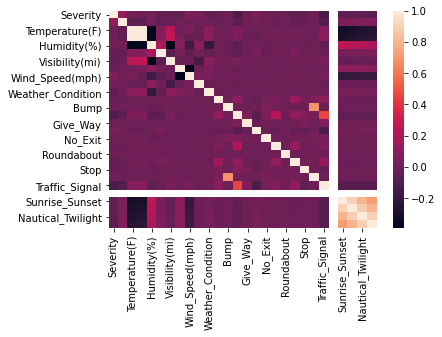

In [10]:
sns.heatmap(X.corr())

In [11]:
colsToDelete = []
corrMatrix = X.corr()
for i in corrMatrix.index:
    for j in corrMatrix.columns:
        if( abs(corrMatrix[i][j])>=0.2 and i!=j ):
            colsToDelete.append(i)
colsToDelete = list( pd.Series(colsToDelete).unique() )
X = X.drop(colsToDelete, axis=1)
X.head()

,Severity,Distance(mi),Pressure(in),Precipitation(in),Weather_Condition,Amenity,Give_Way,Junction,No_Exit,Roundabout,Station,Stop,Turning_Loop
5,3.0,0.01,29.63,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,3.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2.0,0.00,29.62,0.01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
predictLat = LinearRegression().fit(X, lat)
predictLng = LinearRegression().fit(X, lng)

In [13]:
print( metrics.mean_squared_error(lat, predictLat.predict(X)) )

24.234926744085712


In [14]:
newX = pd.DataFrame( PolynomialFeatures(degree=2).fit_transform(X) )
newX.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1.0,3.0,0.01,29.63,0.03,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,0.00,29.62,0.01,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

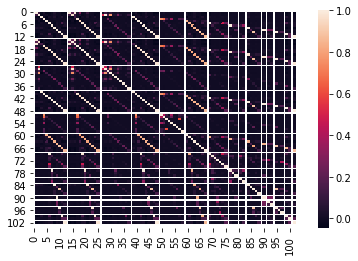

In [15]:
sns.heatmap(newX.corr())

In [16]:
colsToDelete = []
corrMatrix = newX.corr()
for i in corrMatrix.index:
    for j in corrMatrix.columns:
        if( abs(corrMatrix[i][j])>=0.2 and i!=j ):
            colsToDelete.append(i)
colsToDelete = list( pd.Series(colsToDelete).unique() )
newX = newX.drop(colsToDelete, axis=1)
newX.head()

,0,13,26,31,34,37,38,49,53,55,...,88,89,91,94,96,98,100,101,103,104
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
predictLatD2 = LinearRegression().fit(newX, lat)
predictLngD2 = LinearRegression().fit(newX, lng)

In [18]:
print( metrics.mean_squared_error(lat, predictLatD2.predict(newX)) )


25.659944731424496


In [20]:
import pickle
filename = 'model.pkl'
pickle.dump(predictLatD2, open(filename, 'wb'))

In [23]:
predictLngD2.predict(newX)

array([-95.31355945, -95.31355945, -95.31355945, ..., -95.31355945,
       -95.31355945, -95.31355945])

In [2]:
df = pd.read_csv("features.csv")
df

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,5,3,40.100590,-82.925194,0.010,37.9,35.5,97.0,29.63,7.0,...,0,0,0,0,0,0,0,0,0,0
1,9,3,40.100590,-82.925194,0.010,37.4,33.8,100.0,29.62,3.0,...,0,0,0,0,0,0,0,0,0,0
2,11,3,39.932709,-82.830910,0.010,37.4,33.8,100.0,29.62,3.0,...,0,0,0,0,0,0,0,0,0,0
3,14,2,39.972038,-82.913521,0.010,37.4,33.8,100.0,29.62,3.0,...,0,0,0,0,1,0,0,0,0,0
4,20,2,40.052509,-82.882332,0.000,33.8,29.6,100.0,29.62,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946496,4232536,2,34.002480,-117.379360,0.543,86.0,86.0,40.0,28.92,10.0,...,0,0,0,0,0,0,0,0,0,0
1946497,4232537,2,32.766960,-117.148060,0.338,70.0,70.0,73.0,29.39,10.0,...,0,0,0,0,0,0,0,0,0,0
1946498,4232538,2,33.775450,-117.847790,0.561,73.0,73.0,64.0,29.74,10.0,...,0,0,0,0,0,0,0,0,0,0
1946499,4232539,2,33.992460,-118.403020,0.772,71.0,71.0,81.0,29.62,10.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
col_names = df.columns.tolist()
index = df.index
print("name of an attribute",'\t',"Type of an attribute")
for i in col_names:
  print(i)

name of an attribute 	 Type of an attribute
Unnamed: 0
Severity
Start_Lat
Start_Lng
Distance(mi)
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [4]:
#split dataset in features and target variable
feature_cols = ['Start_Lat',
                'Start_Lng',
                'Distance(mi)',
                'Temperature(F)',
                'Wind_Chill(F)',
                'Humidity(%)',
                'Pressure(in)',
                'Visibility(mi)',
                'Wind_Direction',
                'Wind_Speed(mph)',
                'Precipitation(in)',
                'Weather_Condition',
                'Amenity',
                'Bump',
                'Crossing',
                'Give_Way',
                'Junction',
                'No_Exit','Railway',
                'Roundabout','Station',
                'Stop','Traffic_Calming',
                'Traffic_Signal',
                'Turning_Loop',
                'Sunrise_Sunset',
                'Civil_Twilight',
                'Nautical_Twilight',
                'Astronomical_Twilight']

X = df[feature_cols] # Features
y = df.Severity # Target variable

In [5]:
X.shape

(1946501, 29)

In [25]:
y

0          3
1          3
2          3
3          2
4          2
          ..
1946496    2
1946497    2
1946498    2
1946499    2
1946500    2
Name: Severity, Length: 1946501, dtype: int64

In [26]:
for i in range(len(y)):
    if y[i]==0 or y[i]==1:
        y[i]=0
    else:
        y[i]=1

/home/ammar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ammar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1946496    1
1946497    1
1946498    1
1946499    1
1946500    1
Name: Severity, Length: 1946501, dtype: int64

In [28]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [29]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/home/ammar/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[     0,   6445],
       [     2, 480179]])

In [32]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

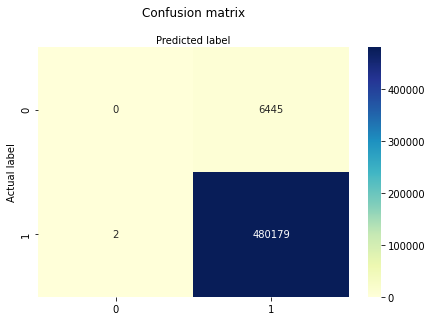

In [33]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9867516326706752
Precision: 0.9867556881699218
Recall: 0.9999958349039216


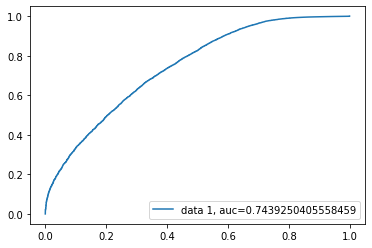

In [35]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [36]:
import pickle
filename = 'model1.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [37]:
import joblib
model = joblib.load("model1.pkl")

In [38]:
processed_results = model.predict(X_test)

In [39]:
processed_results

array([1, 1, 1, ..., 1, 1, 1])